**<h1>Tarea2: Movimiento de un sólido</h1>**
<h2>Movimiento relativo de un cuerpo en la superficie de la Tierra</h2>

**Integrantes:**
1. Jerónimo López Gómez C.C. 1001.735.333
2. Valentina Lobo Ruiz C.C. 1067912559

**<h2>Planteamiento del Problema</h2>**
Desde la física se ha planteado la existencia de 4 fuerzas fundamentales en nuestro universo. Estás son la fuerza gravitacional, la fuerza electromágnetica, la fuerza fuerte y la fuerza débil. Sin embargo, cuando se analiza el movimiento de un cuerpo sólido desde un sistema de referencia no inercial se pueden apreciar unas fuerzas ficticias debidas a la inercia: **Fuerza centrifuga** y **Efecto Coriolis**. En el presente trabajo exploraremos las ecuaciones que describen el movimiento relativo de un cuerpo sobre la superficie de la Tierra la superficie de la Tierra.

**<h2>Marco Teórico</h2>**

$$m\frac{d^{2}\vec{r} }{\mathrm{d} t^2} = -\frac{\partial U }{\partial \vec{r}} + 2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega }  +m\vec{\Omega }\times(\vec{\Omega } \times \vec{r})$$

**<h2>Desarrollo de solución</h2>**

In [9]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [15]:
#Solucionese el sistema diferencial para el movimiento de la esfera

#Parametros iniciales del sistema fisico correspondientemente 


def dynamic_sys(t, state, g, m,omega):
    #P = list(params.values())

    x, y, z, vel_x, vel_y, vel_z = state

    v = np.sqrt(vel_x**2+vel_y**2+vel_z**2)   #Magnitud de la Velocidad

    x_dtdt =  2*omega*vel_y + omega**2 * z #Ecuacion de Movimiento para x

    y_dtdt = -2*omega*vel_x + omega**2 * y  #Ecuacion de Movimiento para y

    z_dtdt = - g #Ecuacion de Movimiento para z

    return [vel_x, vel_y, vel_z, x_dtdt, y_dtdt, z_dtdt]

In [12]:
def RK4(t, state, dt, g, m, omega):          

    K1 = dynamic_sys(t, state, g, m, omega)
    K2 = dynamic_sys(t + 0.5*dt, [s+0.5*dt*k for s,k in zip(state, K1)], g, m, omega)
    K3 = dynamic_sys(t + 0.5*dt, [s+0.5*dt*k for s,k in zip(state, K2)], g, m, omega)
    K4 = dynamic_sys(t + dt, [s+dt*k for s,k in zip(state, K3)], g, m, omega)

    K = [s + dt/6 * (k1_i + 2*k2_i + 2*k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, K1, K2, K3, K4)]

    return K

In [17]:
def motion(state_0, g, m,omega):

    #state0 --> condiciones iniciales del movimiento [x_0, y_0, z_0, v0, ang_polar, ang_azimutal]
    #state_0= list(state0.values())

    theta = np.radians(state_0[4])
    phi = np.radians(state_0[5])
    vx0 = state_0[3] * np.sin(theta) * np.cos(phi)
    vy0 = state_0[3] * np.sin(theta) * np.sin(phi)
    vz0 = state_0[3] * np.cos(theta)
    state = [state_0[0], state_0[1], state_0[2], vx0, vy0, vz0]  #Condiciones iniciales del Movimiento
    dt = 0.01
    times = [0]
    x_values = [state_0[0]]
    y_values = [state_0[1]]
    z_values = [state_0[2]]

    i = 0
    
    while i<1000:                        #Modulador de iteraciones
        t = times[-1]
        state = RK4(t, state, dt, g, m, omega)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
        z_values.append(state[2])

        i +=1
    
    tiempo_de_vuelo = times[-1]
    
    return tiempo_de_vuelo, times, x_values, y_values, z_values



In [22]:
omega_C4 = 100
m = 1
g = -9.8
state0_C4 = list({'x_0':0, 'y_0':0, 'z_0':0, 'v0':60, 'ang_polar':45, 'ang_azim': 0}.values())

t_total_C4, times_C4, X_C4, Y_C4, Z_C4 = motion(state0_C4, g, m, omega_C4)

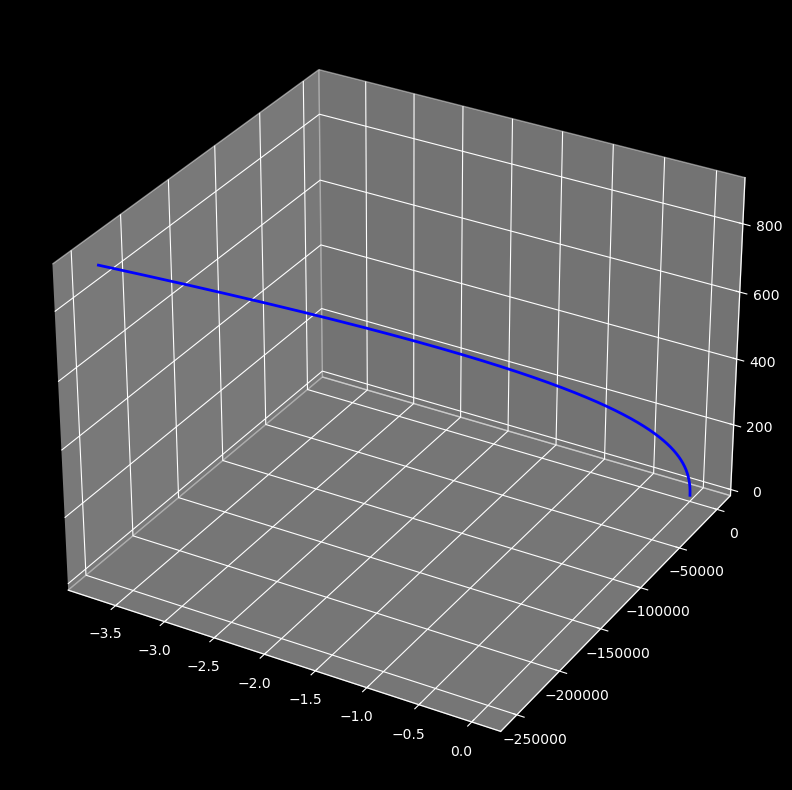

In [23]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.plot(X_C4, Y_C4, Z_C4, c = 'b', linewidth = 2, label = '$\\vec{\omega}$ = (0, 10, -2)')